<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Daniel!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

# Megaline Data Analysis and Hypothesis Testing

The goal of this project is to analyze how the users of each megaline plan use their plans, how much revenue is brought in by each plan on average, how many messages, calls, minutes and how much data in megabytes, the users of each plan use per month. 

I will clean each data set, combine the most important information from each data set making sure to include the plan information as well. I will then split the data into two groups, one with Surf plan users only, and one with the Ultimate users only. I will use these two data sets for most of the analysis, occassionally using the master data frame that contains all the information for users of both plans. 

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import math as math
import matplotlib.pyplot as plt

## Load data

All datasets loaded in as dataframes.

In [2]:
# Load the data files into different DataFrames
df_users = pd.read_csv('/datasets/megaline_users.csv')

In [3]:
df_calls = pd.read_csv('/datasets/megaline_calls.csv')

In [4]:
df_messages = pd.read_csv('/datasets/megaline_messages.csv')

In [5]:
df_plans = pd.read_csv('/datasets/megaline_plans.csv')

In [6]:
df_internet = pd.read_csv('/datasets/megaline_internet.csv')

## Prepare the data

In [7]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [8]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [9]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [10]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Nothing to worry about here.

In [11]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Changed 'user_id' data to object for consistency. There are no duplicate rows or missing values. 

## Plans

In [12]:
# Print the general/summary information about the plans' DataFrame
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [13]:
# Print a sample of data for plans
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


This data includes the information for the two different plans megaline offers. Surf is their more basic plan and is much more limited in terms of messages, minutes, and megabytes per month. As this dataframe only has two rows, it's clear to see that there are no duplicates or missing values, all of the data looks right. 

## Fix data

It doesn't appear that there is anything to fix here. 

## Enrich data

In [14]:
new_cols=['plan_name','messages_included','mb_per_month_included', 'minutes_included','usd_monthly_pay','usd_per_gb','usd_per_message','usd_per_minute']

df_plans = df_plans.reindex(columns=new_cols)
         
df_plans.head()         
         

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


I don't think there's anything that's helpful to add here, but I did reindex the columns because it's easier to understand this way. 

## Users

In [15]:
# Print the general/summary information about the users' DataFrame
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
# Print a sample of data for users
df_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


This data shows the information for each user, including the plan they have, when they subscribed to that plan, and when they stopped using the service. However the churn_date column (when they stopped using the service) appears to have many missing values. I think it would be best to leave them there for now but replace 'NaN' with 'Unknown'. It may be helpful to change the user_id Dtype to object as I'm not going to be doing calculations with an ID number. 

### Fix Data

In [17]:
print(df_users['churn_date'].isna().sum())

df_users['churn_date']=df_users['churn_date'].fillna('Unknown')
print(df_users['churn_date'].isna().sum())
df_users.isna().sum()

466
0


user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

In [18]:
print(df_users.duplicated().sum())

0


In [19]:
df_users['user_id'] = df_users['user_id'].astype('object')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    object
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.4+ KB


The users df has no duplicates but the 'churn_date' column was full of NA values, there's not a way to fill this data with a real date so it's best to leave it as Unknown. According to the description, the null values just indicate that the user's still had active service at the time the data was recorded.

### Enrich Data

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__


Great. First look at the data is done

## Calls

In [20]:
# Print the general/summary information about the calls' DataFrame
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [21]:
# Print a sample of data for calls
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


This dataframe records the dates and duration of each call from each user with the additional reference (id). It may be helpful to rename the 'id' column to "call_id" for clarity. Once again, I think it's helpful to change the user_id Dtype to object for consistency. There are no null values. 

### Fix data

In [22]:
print(df_calls.duplicated().sum())
df_calls['user_id'] = df_calls['user_id'].astype('object')
df_calls.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  object 
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), object(3)
memory usage: 4.2+ MB


In [23]:
print(df_calls[['user_id','duration']].duplicated().sum())
print(df_calls[['id','user_id']].duplicated().sum())

37214
0


In [24]:
df_calls.columns=['call_id','user_id','call_date','duration']
df_calls.head()

,call_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


The calls data frame has no missing values and no fully duplicated rows. There are duplicates between the user_id and duration columns, however, it's hard to say whether this is an issue or not. There aren't duplicate call id's associated with each user which makes me think the other duplicates aren't issues. I changed the user_id data type to an object for consistency and changed the 'id' column name to 'call_id' for clarity.

### Enrich data

In [25]:
df_calls['call_date']=pd.to_datetime(df_calls['call_date'],format='%Y-%m-%d')
df_calls['month']=df_calls['call_date'].dt.month
print(df_calls.head())

df_calls['duration'] = df_calls['duration'].apply(math.ceil)
print(df_calls.head())



    call_id user_id  call_date  duration  month
0   1000_93    1000 2018-12-27      8.52     12
1  1000_145    1000 2018-12-27     13.66     12
2  1000_247    1000 2018-12-27     14.48     12
3  1000_309    1000 2018-12-28      5.76     12
4  1000_380    1000 2018-12-30      4.22     12
    call_id user_id  call_date  duration  month
0   1000_93    1000 2018-12-27         9     12
1  1000_145    1000 2018-12-27        14     12
2  1000_247    1000 2018-12-27        15     12
3  1000_309    1000 2018-12-28         6     12
4  1000_380    1000 2018-12-30         5     12


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Good for you for using the np.ceil() method
    

I changed the call_date column to datetime format and then added a column that contained just the month of the call date. I also rounded up the duration to a whole 'minute' as the description says that that is how megaline processes it. 

## Messages

In [26]:
# Print the general/summary information about the messages' DataFrame
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [27]:
# Print a sample of data for messages
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [28]:
print(df_messages.duplicated().sum())

0


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Duplicate checking is the basis of data preprocessing

In [29]:
df_messages['user_id']=df_messages['user_id'].astype('object')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  object
 2   message_date  76051 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [30]:
df_messages.columns=['text_id','user_id','message_date']
df_messages.head(2)

,text_id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31


There are no duplicates or missing values. I changed the user_id column from an int to an object for consistency. I also changed 'id' to 'text_id' for clarity

### Enrich data

In [31]:
df_messages['message_date']=pd.to_datetime(df_messages['message_date'],format='%Y-%m-%d')
df_messages['month']=df_messages['message_date'].dt.month
df_messages.head()

,text_id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


I changed the message_date column to datetime format and added a column that contained only the month of the message sent. 

## Internet

In [32]:
# Print the general/summary information about the internet DataFrame
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
# Print a sample of data for the internet traffic
df_internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


This dataframe displays the date and megebytes used by each user during a specific web session. There are no missing values, it would be helpful to rename 'id' to 'session_id' for clarity, as well as again changing 'user_id' Dtype to an object for consistency.

### Fix data

In [34]:
df_internet['user_id']=df_internet['user_id'].astype('object')

print(df_internet.duplicated().sum())

0


In [35]:
df_internet.columns=['session_id','user_id','session_date','mb_used']
df_internet.head(2)

,session_id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00


There are no duplicate rows or missing values. Renamed id column to 'session_id'. 

### Enrich data

In [36]:
df_internet['session_date']=pd.to_datetime(df_internet['session_date'],format='%Y-%m-%d')
df_internet['month']=df_internet['session_date'].dt.month
df_internet.head()

,session_id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


I changed the session_date column to datetime format and added a column that contained only the month of the recorded session.

## Study plan conditions

In [37]:
# Print out the plan conditions and make sure they are clear for you
df_plans.head()


,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


In [38]:
# Calculate the number of calls made by each user per month. Save the result.
print(df_calls.head())
print()
calls_per_month=df_calls.groupby('user_id').agg({'month':'value_counts'})
calls_per_month.head()
calls_per_month.columns=['#_of_calls']
print(calls_per_month)

    call_id user_id  call_date  duration  month
0   1000_93    1000 2018-12-27         9     12
1  1000_145    1000 2018-12-27        14     12
2  1000_247    1000 2018-12-27        15     12
3  1000_309    1000 2018-12-28         6     12
4  1000_380    1000 2018-12-30         5     12

               #_of_calls
user_id month            
1000    12             16
1001    10             65
        11             64
        12             56
        9              49
...                   ...
1498    5              35
1499    12             65
        10             53
        11             45
        9              41

[2258 rows x 1 columns]


I created a separate column that conatins the number of calls for each user_id according to month.

In [39]:
# Calculate the amount of minutes spent by each user per month. Save the result.
df_calls.head()
minutes_per_month = df_calls.groupby(['user_id','month']).agg({'duration':'sum'})
minutes_per_month.head(10)

duration
user_id month          
1000    12          124
1001    8           182
        9           315
        10          393
        11          426
        12          412
1002    10           59
        11          386
        12          384
1003    12         1104

I created a separate column that contains the total number of minutes used by each user, each month. 

In [40]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_per_month = df_messages.groupby(['user_id']).agg({'month':'value_counts'})
messages_per_month.columns=['#_of_messages']
print(messages_per_month)

               #_of_messages
user_id month               
1000    12                11
1001    10                53
        9                 44
        12                44
        11                36
...                      ...
1496    10                18
        11                13
        12                11
        8                  2
1497    12                50

[1806 rows x 1 columns]


I created a separate column that conatins the number of messages sent from each user, each month. 

In [41]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
print(df_internet.head())

internet_volume = df_internet.groupby(['user_id','month']).agg({'mb_used':'sum'})
internet_volume.head(10)

  session_id user_id session_date  mb_used  month
0    1000_13    1000   2018-12-29    89.86     12
1   1000_204    1000   2018-12-31     0.00     12
2   1000_379    1000   2018-12-28   660.40     12
3   1000_413    1000   2018-12-26   270.99     12
4   1000_442    1000   2018-12-27   880.22     12


mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
        12     19369.18
1002    10      6552.01
        11     19345.08
        12     14396.24
1003    12     27044.14

I created a separate column that conatins the total mb used by each user, each month. 

In [42]:
def round_up_to_thousand(x):
    x = math.ceil(x / 1024)
    return(x*1024)
    
internet_volume['mb_used'] = internet_volume['mb_used'].apply(round_up_to_thousand)
internet_volume.columns=['gb_used']
print(internet_volume.head(15))


               gb_used
user_id month         
1000    12        2048
1001    8         7168
        9        14336
        10       22528
        11       19456
        12       19456
1002    10        7168
        11       19456
        12       15360
1003    12       27648
1004    5         7168
        6        21504
        7        24576
        8        28672
        9        19456


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

There are 1,024 megabytes in one gigabyte.

^ I'm not sure how to color cells blue to mark my return comments. However, I think I fixed the above issue by dividing the number of megabytes by 1024 and rounding them all up to the nearest whole number, effectively converting them to gigabytes. I then converted them back to megabytes by multiplying 1024 to it.


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Now correct

Megaline rounds their users data up. Even if a user used 1025 megabytes, megaline charges for 2 gigabytes (2048mb).
I divided the users megabytes usage by 1024, rounded up to the nearest number, then multiplied that number by 1024 to get the number of megabytes users would be charged for. 

In [43]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

merged_data = minutes_per_month.merge(internet_volume, on=['user_id','month'])
merged_data = merged_data.merge(messages_per_month, on=['user_id','month'])
merged_data = merged_data.merge(calls_per_month, on=['user_id','month'])

merged_data.columns=['minutes_used','mb_used','#_of_messages','#_of_calls']

merged_data=merged_data.reset_index()
merged_data.head(15)

,user_id,month,minutes_used,mb_used,#_of_messages,#_of_calls
0,1000,12,124,2048,11,16
1,1001,8,182,7168,30,27
2,1001,9,315,14336,44,49
3,1001,10,393,22528,53,65
4,1001,11,426,19456,36,64
5,1001,12,412,19456,44,56
6,1002,10,59,7168,15,11
7,1002,11,386,19456,32,55
8,1002,12,384,15360,41,47
9,1003,12,1104,27648,50,149


I merged all of the previous columns together using the user_id and month columns to sort it correctly.

In [44]:
# Add the plan information
new_df = merged_data.merge(df_users, on='user_id')
trimmed_df = new_df.drop(['first_name','last_name','age','reg_date','churn_date'], axis='columns')
trimmed_df.columns=['user_id','month','minutes_used','mb_used','#_of_messages','#_of_calls', 'city', 'plan_name']

full_df = trimmed_df.merge(df_plans, on='plan_name')
full_df.head()

,user_id,month,minutes_used,mb_used,#_of_messages,#_of_calls,city,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,124,2048,11,16,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01
1,1006,11,10,3072,15,2,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01
2,1006,12,59,32768,139,9,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01
3,1008,10,476,17408,21,71,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01
4,1008,11,446,24576,37,63,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01


I added the user information and the plan information to the previously made dataframe. I dropped the several columns I thought wouldn't be relevant, though I made sure to leave the dropped columns intact in the 'new_df' dataframe. 

In [45]:
# Calculate the monthly revenue for each user

surf_users = full_df[full_df['plan_name'] == 'surf'].copy()
ultimate_users = full_df[full_df['plan_name'] == 'ultimate'].copy()


I separated the dataframe containing all of the users information into two separate dataframes. 
surf_users contains all the information for users with the surf plan. 
ultimate_users contains all the information for users with the ultimate plan. 

In [46]:
def calculate_revenue(row):
    plan_details = {
        'surf': {'fee': 20, 'minutes': 500, 'texts': 50, 'data_gb': 15, 'extra_minute': 0.03, 'extra_text': 0.03, 'extra_gb': 10},
        'ultimate': {'fee': 70, 'minutes': 3000, 'texts': 1000, 'data_gb': 30, 'extra_minute': 0.01, 'extra_text': 0.01, 'extra_gb': 7}
    }
    
    plan = plan_details[row['plan_name']]
    
    extra_minutes = max(0, row['minutes_used'] - plan['minutes'])
    extra_texts = max(0, row['#_of_messages'] - plan['texts'])
    extra_data_gb = max(0, (row['mb_used'] / 1024) - plan['data_gb'])
    
    extra_cost = (
        extra_minutes * plan['extra_minute'] + 
        extra_texts * plan['extra_text'] +
        extra_data_gb * plan['extra_gb']
    )
    
    total_cost = plan['fee'] + extra_cost
    return total_cost

# Apply the function to each row
surf_users.loc[:, 'monthly_revenue'] = surf_users.apply(calculate_revenue, axis=1)
ultimate_users.loc[:, 'monthly_revenue'] = ultimate_users.apply(calculate_revenue, axis=1)
full_df.loc[:,'monthly_revenue'] = full_df.apply(calculate_revenue, axis=1)
full_df.head(2)


,user_id,month,minutes_used,mb_used,#_of_messages,#_of_calls,city,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue
0,1000,12,124,2048,11,16,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,70.0
1,1006,11,10,3072,15,2,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,70.0


Created a function that would calculate the monthly revenue for each user of each plan, including the additional charges. This function also added a column at the end of each dataframe. This column conatains the new information. 

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great code

## Study user behaviour

### Calls

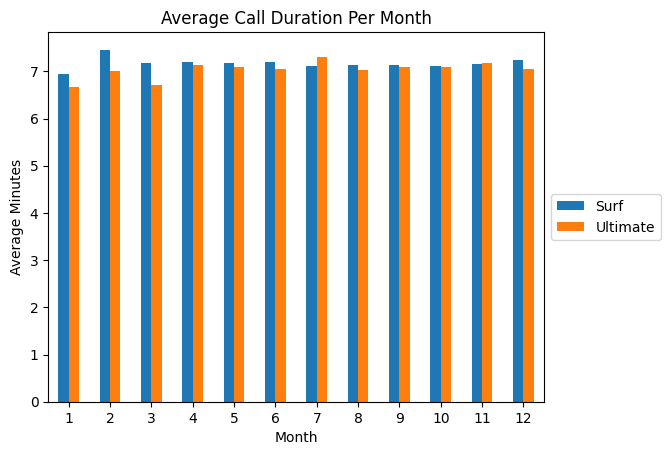

In [47]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
test = full_df.merge(df_calls,on=['user_id','month'])
test = test.drop(['call_id','call_date'],axis='columns')
averages = test.groupby(['month','plan_name'])['duration'].mean().reset_index()
surf_average = averages[averages['plan_name']=='surf']
ultimate_average = averages[averages['plan_name']=='ultimate']
surf_average

plottable=surf_average.merge(ultimate_average, on='month')
plottable.columns=['Month','plan_names','surf_average','plan_nameu','ultimate_average']
plottable = plottable.drop(['plan_names','plan_nameu'],axis='columns')
plottable.head()
plottable.plot(kind='bar',x='Month', y=['surf_average','ultimate_average'], xlabel='Month',
                ylabel='Average Minutes',title='Average Call Duration Per Month',rot=0)

plt.legend(['Surf','Ultimate'], loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()


It appears that on average, people with the Surf plan have longer calls. Which tells us that they they are likely using more minutes than the ultimate users. 

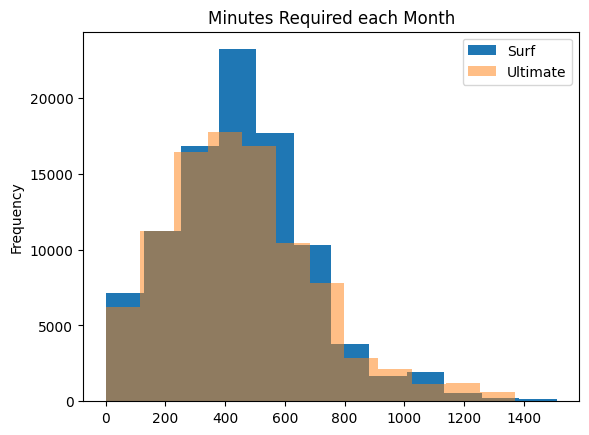

In [48]:
surf_minutes = surf_users[['month','minutes_used']]
surf_minutes.columns=['month','surf_minutes']
ultimate_minutes = ultimate_users[['month','minutes_used']]
ultimate_minutes.columns=['month','ultimate_minutes']

df_minutes = surf_minutes.merge(ultimate_minutes, on='month')
df_minutes.head()

df_minutes['surf_minutes'].plot(kind='hist',bins=12)
df_minutes['ultimate_minutes'].plot(kind='hist',bins=12, alpha=0.5, title='Minutes Required each Month')
plt.legend(['Surf','Ultimate'])
plt.show()

This histogram confirms the previous bar plot. Surf users tend to use more minutes each month than ultimate users. 

In [49]:
# Calculate the mean and the variance of the monthly call duration
surf_users.head()
ultimate_users.head()

surf_min_mean = surf_users['minutes_used'].mean()
surf_min_var = np.var(surf_users['minutes_used'])

ultimate_min_mean = ultimate_users['minutes_used'].mean()
ultimate_min_var = np.var(ultimate_users['minutes_used'])

print("The Surf mean is:", surf_min_mean)
print("The Ultimate mean is:", ultimate_min_mean)
print("The Surf Variance is:", surf_min_var)
print("The Ultimate Variance is:", ultimate_min_var)

The Surf mean is: 445.77542372881356
The Ultimate mean is: 442.51295336787564
The Surf Variance is: 55274.530073972994
The Ultimate Variance is: 62180.81978039679


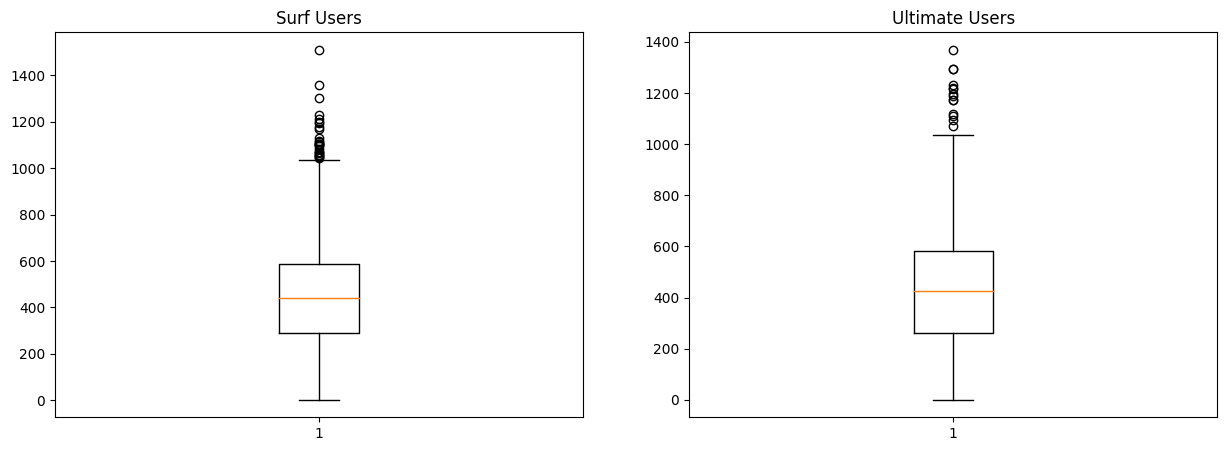

In [50]:
# Plot a boxplot to visualize the distribution of the monthly call duration
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].boxplot(surf_users['minutes_used'])
axs[0].set_title('Surf Users')

axs[1].boxplot(ultimate_users['minutes_used'])
axs[1].set_title('Ultimate Users')

plt.show()



It appears that the surf users tend to use more minutes and have longer call durations on average, although it's by a very small margin. The surf users mean minutes per month is 445 while the ultimate users mean is 442. The box plots above reflect how close the behaviors of users of both plans are.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great visualization

### Messages

In [51]:
# Compare the number of messages users of each plan tend to send each month
s_message_avg = surf_users.groupby('month')['#_of_messages'].mean().reset_index()
s_message_avg.columns=['month','s_avg_messages']
u_message_avg = ultimate_users.groupby('month')['#_of_messages'].mean().reset_index()
u_message_avg.columns=['month','u_avg_messages']

avg_messages = s_message_avg.merge(u_message_avg, on="month")
avg_messages

,month,s_avg_messages,u_avg_messages
0,1,21.000000,20.666667
1,2,21.600000,27.800000
2,3,21.937500,34.714286
3,4,24.685714,28.937500
4,5,33.547170,44.333333
5,6,32.742857,37.135135
6,7,34.786517,41.212766
7,8,37.302521,47.929825
8,9,38.585034,45.901408
9,10,41.475138,47.488636


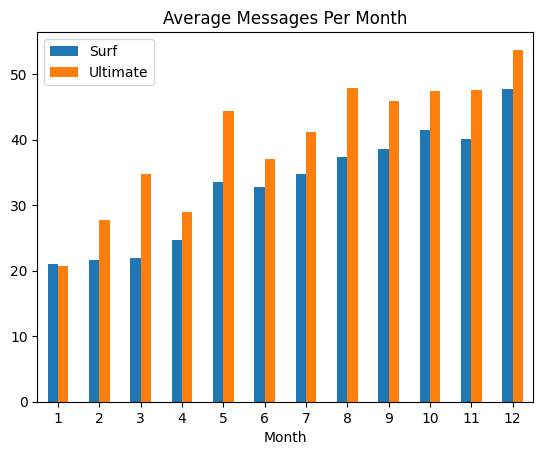

In [52]:
avg_messages.plot(kind='bar',x='month',y=['s_avg_messages','u_avg_messages'], xlabel='Month', title='Average Messages Per Month', rot=0)
plt.legend(['Surf','Ultimate'])
plt.show()

In [53]:
# Compare the amount of internet traffic consumed by users per plan
surf_users.head()
s_mb_avg=surf_users.groupby('month')['mb_used'].mean().reset_index()
s_mb_avg.columns = ['Month','Surf_mb']
u_mb_avg=ultimate_users.groupby('month')['mb_used'].mean().reset_index()
u_mb_avg.columns=['Month','Ultimate_mb']

mb_avg = s_mb_avg.merge(u_mb_avg, on='Month')
mb_avg.head()

,Month,Surf_mb,Ultimate_mb
0,1,8192.000000,7509.333333
1,2,9625.600000,17817.600000
2,3,12928.000000,24429.714286
3,4,12375.771429,14848.000000
4,5,15417.962264,17651.809524


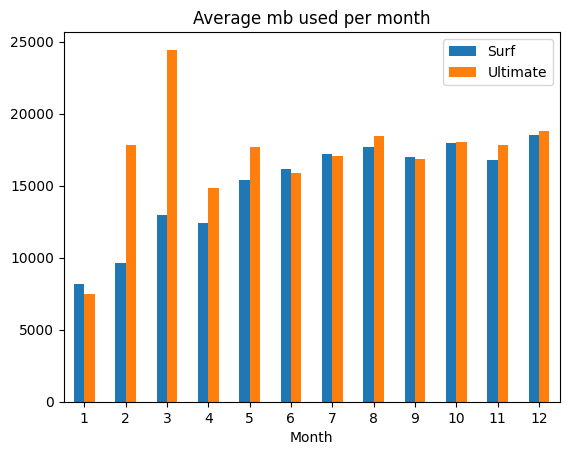

In [54]:
mb_avg.plot(kind='bar', x='Month',y=['Surf_mb','Ultimate_mb'],title='Average mb used per month', rot=0)
plt.legend(['Surf','Ultimate'])
plt.show()

In [55]:
surf_message_avg = surf_users['#_of_messages'].mean().round(2)
surf_mb_avg = surf_users['mb_used'].mean().round(2)
ultimate_message_avg = ultimate_users['#_of_messages'].mean().round(2)
ultimate_mb_avg = ultimate_users['mb_used'].mean().round(2)

print('The overall average amount of messages surf users sent in a year is:',surf_message_avg,
     'while the ultimate users sent:',ultimate_message_avg)
print()
print('The overall average amount of megabytes surf users used in a year is:', surf_mb_avg,
      'while the ultimate users used:', ultimate_mb_avg)

The overall average amount of messages surf users sent in a year is: 39.49 while the ultimate users sent: 46.46

The overall average amount of megabytes surf users used in a year is: 17154.6 while the ultimate users used: 17759.94


It's clear that ultimate users send more messages on average than surf users. Ultimate users also tend to use more megabytes than the surf users, especially in the months of February and March.

### Internet

In [56]:
df_internet.head()
trim_df_internet = df_internet.drop(['session_id','mb_used','month'],axis='columns')
plan_names = full_df[['user_id','plan_name']]

trim_df_internet = trim_df_internet.merge(plan_names, on='user_id')
trim_df_internet

surf_internet = trim_df_internet[trim_df_internet['plan_name']=='surf']
ultimate_internet=trim_df_internet[trim_df_internet['plan_name']=='ultimate']

surf_internet= surf_internet.groupby('user_id')['session_date'].value_counts()

ultimate_internet = ultimate_internet.groupby('user_id')['session_date'].value_counts()

print(surf_internet.head())
print(ultimate_internet.head())


user_id  session_date
1001     2018-10-22      25
         2018-12-27      25
         2018-12-29      25
         2018-09-08      20
         2018-09-17      20
Name: session_date, dtype: int64
user_id  session_date
1000     2018-12-26      1
         2018-12-27      1
         2018-12-28      1
         2018-12-29      1
         2018-12-31      1
Name: session_date, dtype: int64


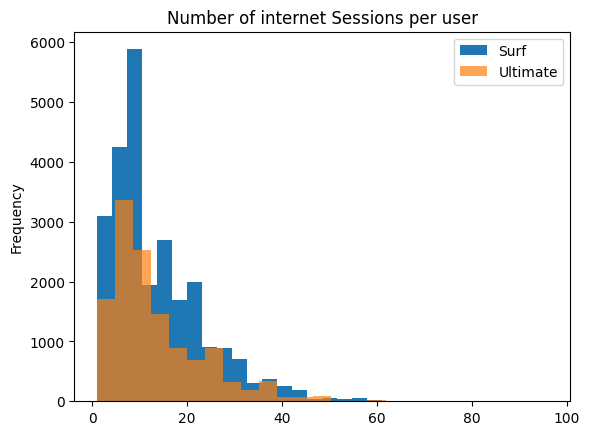

In [57]:
surf_internet.plot(kind='hist', bins=25)
ultimate_internet.plot(kind='hist',bins=25, alpha=0.7, title='Number of internet Sessions per user')
plt.legend(['Surf','Ultimate'])

Based on the last two charts, the surf users tend to have more frequent internet sessions than the ultimate users, however; ultimate users consume more data overall. 

## Revenue

In [58]:
print(surf_users['monthly_revenue'].describe())
print(ultimate_users['monthly_revenue'].describe())

surf_monthly_rev = surf_users.groupby('month')['monthly_revenue'].sum().reset_index()
surf_monthly_rev.columns=['Month','Surf_rev']
ultimate_monthly_rev = ultimate_users.groupby('month')['monthly_revenue'].sum().reset_index()
ultimate_monthly_rev.columns=['Month','Ultimate_rev']

monthly_rev = surf_monthly_rev.merge(ultimate_monthly_rev,on='Month')
monthly_rev.head()

count    1180.000000
mean       60.415839
std        53.595739
min        20.000000
25%        20.022500
50%        41.035000
75%        80.232500
max       590.370000
Name: monthly_revenue, dtype: float64
count    579.000000
mean      72.248705
std       11.034406
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: monthly_revenue, dtype: float64


,Month,Surf_rev,Ultimate_rev
0,1,20.00,210.0
1,2,119.57,350.0
2,3,616.65,546.0
3,4,1420.70,1169.0
4,5,2695.43,1491.0


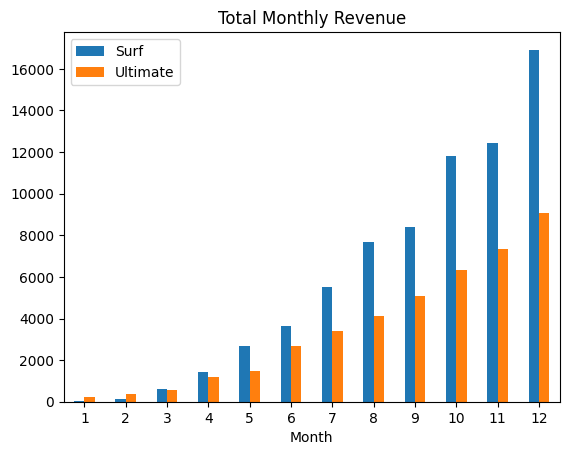

In [59]:
monthly_rev.plot(kind='bar', x='Month',y=['Surf_rev','Ultimate_rev'], rot=0, title='Total Monthly Revenue')
plt.legend(['Surf','Ultimate'])
plt.show()

In [60]:
surf_monthly_avg = surf_users.groupby('month')['monthly_revenue'].mean().reset_index()
surf_monthly_avg.columns=['Month','Surf_avg']
ultimate_monthly_avg = ultimate_users.groupby('month')['monthly_revenue'].mean().reset_index()
ultimate_monthly_avg.columns=['Month','Ultimate_avg']

monthly_avg = surf_monthly_avg.merge(ultimate_monthly_avg,on='Month')
monthly_avg.head()

,Month,Surf_avg,Ultimate_avg
0,1,20.000000,70.0000
1,2,23.914000,70.0000
2,3,38.540625,78.0000
3,4,40.591429,73.0625
4,5,50.857170,71.0000


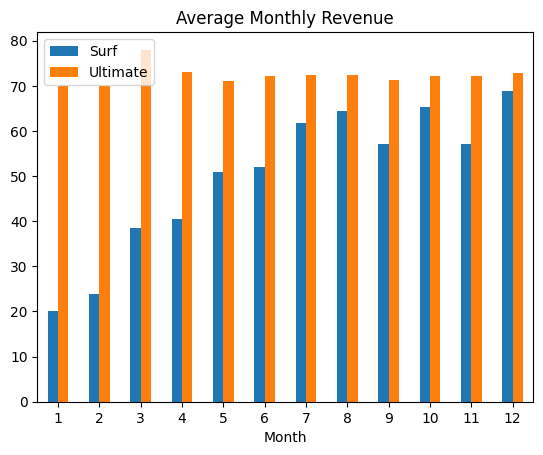

In [61]:
monthly_avg.plot(kind='bar', x='Month', y=['Surf_avg','Ultimate_avg'], rot=0, title='Average Monthly Revenue')
plt.legend(['Surf','Ultimate'])
plt.show()

While the average revenue for the ultimate plan is higher, the surf plan brings in more total revenue each month. This makes sense as there's almost twice the amount of users on the surf plan than on the ultimate plan.

I will run two statistical hypotheses tests to test for two conditions of equality.
The two null hypotheses (Ho) are as follows. 
1. The monthly averages of each plan are the same. 
2. The average revenue of the NY-NJ area is the same as other areas. 

The two alternative hypotheses (H1) are:
1. The monthly average for each of the plans are different.
2. The average monthly revenue of the NY-NJ are different. 

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

The wording of Ho and H1 is missing. Please add them to the section

## Test statistical hypotheses

In [62]:
s_var = surf_monthly_avg['Surf_avg'].var()
u_var = ultimate_monthly_avg['Ultimate_avg'].var()
print(s_var)
print(u_var)

258.43987049635433
4.228420038122426


In [63]:
# Test the hypotheses
s_avg = surf_monthly_avg['Surf_avg']
u_avg = ultimate_monthly_avg['Ultimate_avg']
alpha = 0.05

results = st.ttest_ind(s_avg, u_avg, equal_var = False)
print("The p-value is:", results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis that the monthly average revenue of each plan are the same')
else: 
    print('We can\'t reject the null hypothesis that the monthly average revenue of each plan are the same')
    

The p-value is: 0.0005476858128530602
We reject the null hypothesis that the monthly average revenue of each plan are the same


In [64]:
# Test the hypotheses
full_df.head()

full_df['city'].unique()

NY_NJ = full_df[full_df['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']
other_areas = full_df[full_df['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']
NY_NJ_avg = NY_NJ['monthly_revenue']
other_areas_avg = other_areas['monthly_revenue']

In [65]:
alpha  = 0.05

results1 = st.ttest_ind(NY_NJ_avg, other_areas_avg, equal_var = False)
print("The p-value is:", results1.pvalue)

if (results1.pvalue < alpha):
    print('We reject the null hypothesis that the average revenue of each of the NY-NJ area are the same as other areas')
else:
    print('We can\'t reject the null hypothesis that the average revenue of each of the NY-NJ area are the same as other areas')


The p-value is: 0.004477811025531896
We reject the null hypothesis that the average revenue of each of the NY-NJ area are the same as other areas


In [66]:
surf = df_users[df_users['plan']=='surf']
print(surf.info())
ultimate = df_users[df_users['plan']=='ultimate']
print(ultimate.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 1 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     339 non-null    object
 1   first_name  339 non-null    object
 2   last_name   339 non-null    object
 3   age         339 non-null    int64 
 4   city        339 non-null    object
 5   reg_date    339 non-null    object
 6   plan        339 non-null    object
 7   churn_date  339 non-null    object
dtypes: int64(1), object(7)
memory usage: 23.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 497
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     161 non-null    object
 1   first_name  161 non-null    object
 2   last_name   161 non-null    object
 3   age         161 non-null    int64 
 4   city        161 non-null    object
 5   reg_date    161 non-null    object
 6   plan       

## General conclusion



Although the average monthly revenue is higher for the ultimate plan, the surf plan brought in more revenue per month. Users of the surf plan tend to exceed their plans limits, especially in minutes and megabyte usage which causes them to be charged additional fees. Ultimate plan users tend to stay within their plans limits.

Ultimate plan users tend to use more internet (megabyte consumption) in fewer sessions than the surf plan users.
Ultimate plan users also send more messages on average than the surf plan users, this is one area where the surf plan users tend to stay more within their plans limits and avoid additional fees. 

For users, the surf plan is likely the better choice and will likely cost them less over time. Though they get charged additional fees when they exceed their plans limits, their monthly average is still lower than the cost of the ultimate plan.

For the company however, based on the data, the surf plan seems to bring in more revenue overall. This is due to the fact that there are more than twice the amount of surf users in the data than ultimate users. With more ultimate users in the data and according to the monthly average, the ultimate plan's monthly revenue would likely exceed the surf users monthly revenue.

It's probably in the companies best interest to look into how they can increase the number of ultimate plan users. 

Lastly, the results of the analysis could be improved with a data set that has closer to an equal number of surf and ultimate plan users. The cell above shows the discrepancy. 339 surf plan users and only 161 ultimate plan users. 


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

You've done a great job. There are a few things that need to be fixed

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊